## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read E-commerce_data File

In [2]:
df = pd.read_excel("E-commerce_data.xlsx", sheet_name=None)

# Display the first few rows of the transactions sheet
print(df["transactions"].head())


   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  
0     uNY-568        NaT          7  
1     kBx-219 2023-06-04          5  
2     PLG-122        NaT          7  
3     Wzf-897        NaT          2  
4     qGb-428 2022-11-20          6  


## Merge All Sheets together

In [3]:

customers = df["customers"].merge(df["genders"], on='gender_id').merge(df["cities"], on='city_id')

# Merge transactions with customers
transactions = df["transactions"].merge(customers, on='customer_id')

# Merge branches and merchants with transactions
transactions = transactions.merge(df["branches"], on='branch_id').merge(df["merchants"], on='merchant_id')



print(transactions.head())


   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  join_date  city_id  gender_id  \
0     uNY-568        NaT          7 2023-05-16       15          2   
1     kBx-219 2023-06-04          5 2022-10-10       14          2   
2     PLG-122        NaT          7 2022-05-30        2          1   
3     Wzf-897        NaT          2 2023-11-27       15          2   
4     qGb-428 2022-11-20          6 2021-09-04       14          1   

  gender_name   city_name  merchant_id                   merchant_name  
0      Female       Aswan            7                  Berry-Anderson  
1      Femal

## Calculate coupon usage frequency

In [4]:

coupon_usage_frequency = transactions.groupby('customer_id')['transaction_id'].count().reset_index()
coupon_usage_frequency.columns = ['customer_id', 'coupon_usage_frequency']


# Merge transactions with coupon_usage_frequency
transactions = transactions.merge(coupon_usage_frequency, on='customer_id')

print(transactions.head())

   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       2024-01-26         subscribed   
4               5          288       2022-10-12             burned   

  coupon_name  burn_date  branch_id  join_date  city_id  gender_id  \
0     uNY-568        NaT          7 2023-05-16       15          2   
1     kBx-219 2023-06-04          5 2022-10-10       14          2   
2     PLG-122        NaT          7 2022-05-30        2          1   
3     Wzf-897        NaT          2 2023-11-27       15          2   
4     qGb-428 2022-11-20          6 2021-09-04       14          1   

  gender_name   city_name  merchant_id                   merchant_name  \
0      Female       Aswan            7                  Berry-Anderson   
1      Fem

## Features Selection

In [5]:
 features = transactions[['customer_id', 'city_name', 'gender_name', 'coupon_usage_frequency', 'transaction_status']]


## Encoding Features

In [6]:
# Use one-hot encoding for categorical features
features_encoded = pd.get_dummies(features, columns=['city_name', 'gender_name', 'transaction_status'])
features_encoded.head()

,customer_id,coupon_usage_frequency,city_name_Alexandria,city_name_Aswan,city_name_Asyut,city_name_Beni Suef,city_name_Cairo,city_name_Damanhur,city_name_Damietta,city_name_El-Mahalla El-Kubra,...,city_name_Qena,city_name_Shubra El-Kheima,city_name_Sohag,city_name_Suez,city_name_Tanta,city_name_Zagazig,gender_name_Female,gender_name_Male,transaction_status_burned,transaction_status_subscribed
0,733,7,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,631,7,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,309,3,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,695,5,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,288,7,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False


## Model Development and Evaluation:

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

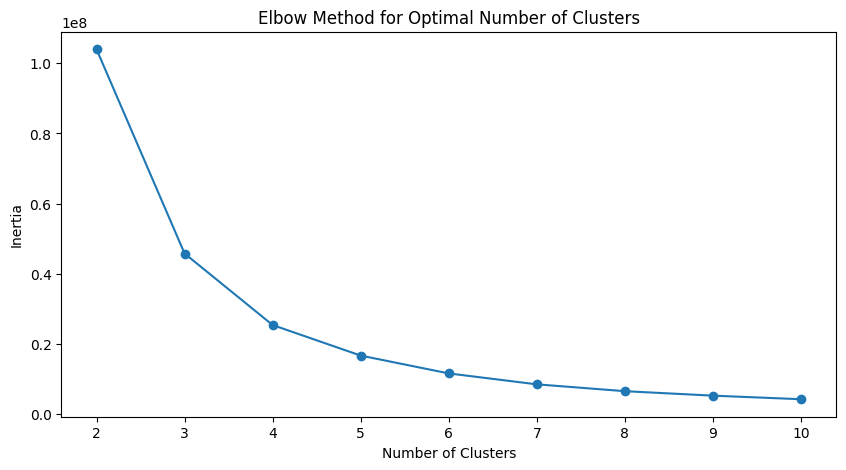

In [8]:
# Initialize an empty list to store the inertia values
inertia = []

# Define the range of clusters to explore
range_n_clusters = range(2, 11) # Exploring clusters from 2 to 10

# Loop through each number of clusters
for n_clusters in range_n_clusters:
    # Initialize and fit the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_encoded)
    
    # Append the calculated inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to visualize the inertia values
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

###  Choose the optimal number of clusters

In [9]:

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(features_encoded)

KMeans(n_clusters=3, random_state=42)

In [18]:
# Inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 45736957.64383063


###  Add the cluster labels to the original dataset

In [17]:
features_encoded['cluster'] = kmeans.labels_
features['cluster'] = kmeans.labels_

In [24]:
print(features_encoded.columns)

Index(['customer_id', 'coupon_usage_frequency', 'city_name_Alexandria',
       'city_name_Aswan', 'city_name_Asyut', 'city_name_Beni Suef',
       'city_name_Cairo', 'city_name_Damanhur', 'city_name_Damietta',
       'city_name_El-Mahalla El-Kubra', 'city_name_Fayyum', 'city_name_Giza',
       'city_name_Ismailia', 'city_name_Mansoura', 'city_name_Minya',
       'city_name_Port Said', 'city_name_Qena', 'city_name_Shubra El-Kheima',
       'city_name_Sohag', 'city_name_Suez', 'city_name_Tanta',
       'city_name_Zagazig', 'gender_name_Female', 'gender_name_Male',
       'transaction_status_burned', 'transaction_status_subscribed',
       'cluster'],
      dtype='object')


## Customer Gender Distribution by Cluster

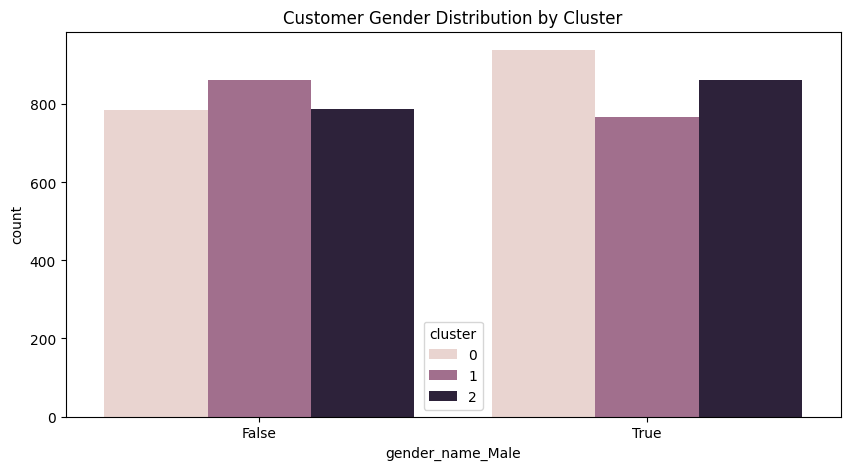

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender_name_Male', hue='cluster', data=features_encoded)
plt.title('Customer Gender Distribution by Cluster')
plt.show()

## Customer City Distribution by Cluster:

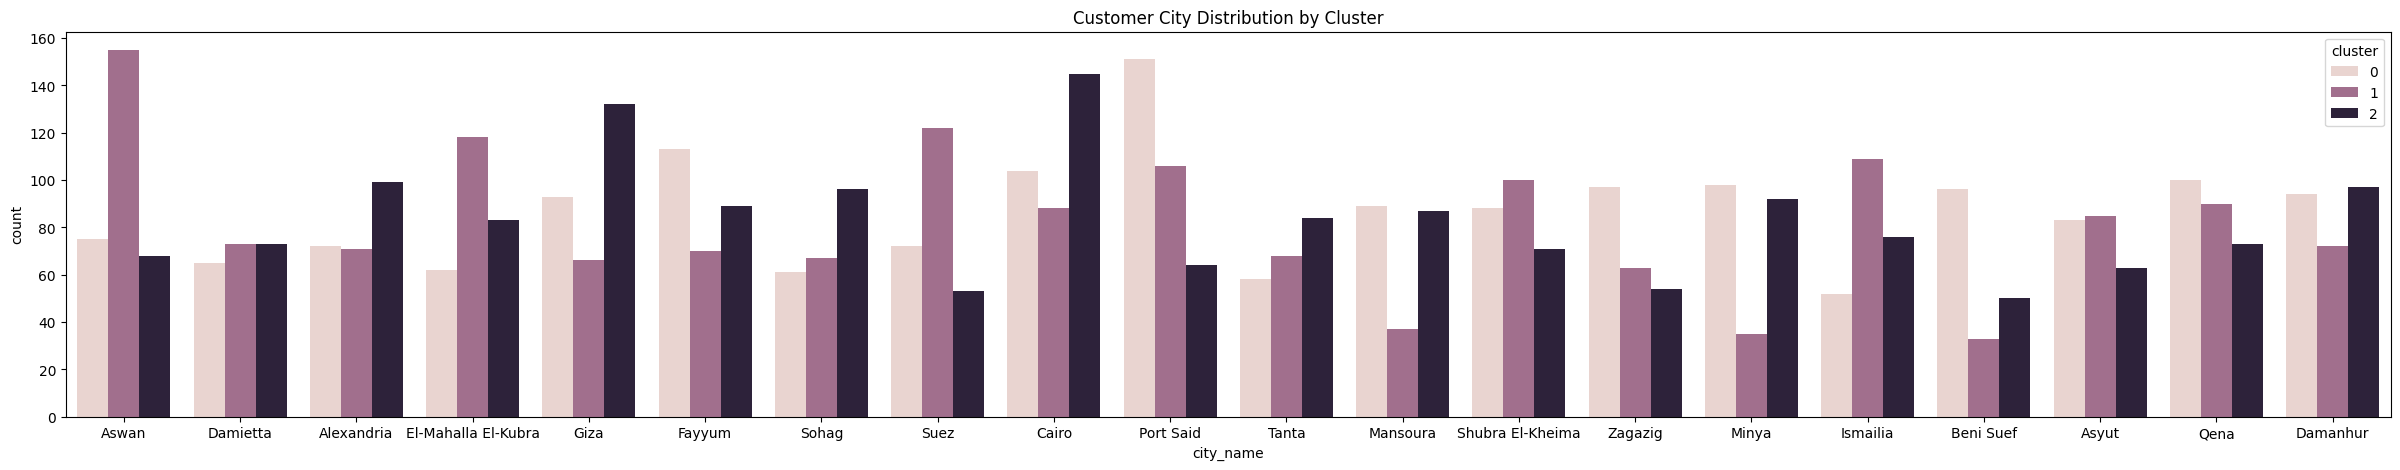

In [21]:
plt.figure(figsize=(30, 5))
sns.countplot(x='city_name', hue='cluster', data=features)
plt.title('Customer City Distribution by Cluster')
plt.show()

## Transaction Status Distribution by Cluster

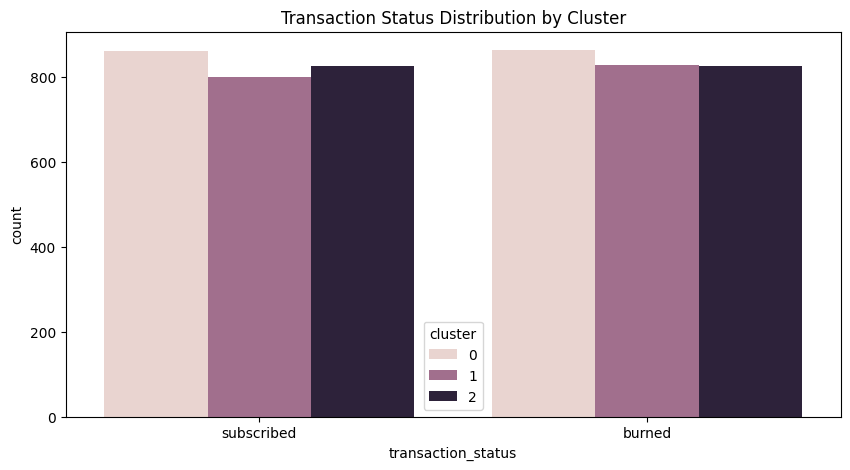

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='transaction_status', hue='cluster', data=features)
plt.title('Transaction Status Distribution by Cluster')
plt.show()

#### As a result from cluster1 :Females in cities like Mansoura, Minya, Beni Suef, Alexandria should be given coupons to maximize their
#### loyalty and satisfaction with the store.